# RANDOM FOREST and LOGISTIC REGRESSION

In [1]:
# This two lines of code make your notebook aware of changes in
# your file without needing to restart the session each time
%load_ext autoreload
%autoreload 2

In [2]:
from random_forest_utils import random_forest
from logistic_regression_utils import logistic_regression
import mirdata
import numpy as np

In [3]:
# data_home = 'data' # here the location you want the data to be in your Drive
# dataset_name = 'gtzan_genre'
# dataset = mirdata.initialize(dataset_name, data_home=data_home)
# # dataset.download()
# print(len(dataset.track_ids))
# dataset.choice_track().audio



# temp

#data_home = '/home/ara/Documents/nyu_fa24_mir/mir_finalProj/data' # here the location you want the data to be in your Drive
# data_home = 'gtzan_mini'
# dataset_name = 'gtzan_genre'
# dataset_version = 'mini'
# dataset = mirdata.initialize(dataset_name, data_home=data_home, version=dataset_version)

# # Uncomment the following line and run the download code once to download the data
# # dataset.download()

# # Uncomment the following line and run the validate code to check the data is correct
# # dataset.validate()

# # Check how many tracks and load a random track
# print(len(dataset.track_ids))
# dataset.choice_track().audio

100


(array([-0.01300049, -0.03060913, -0.03607178, ...,  0.0098877 ,
         0.01107788,  0.0118103 ], dtype=float32),
 22050)

In [4]:
# make obj
rf = random_forest()
lr = logistic_regression()

initializing random forest classifier
initializing logistic regression classifier


In [5]:
# print(dataset.choice_track())

Track(
  audio_path="gtzan_mini/gtzan_mini-main/genres/metal/metal.00006.wav",
  beats_path="gtzan_mini/gtzan_tempo_beat-main/beats/gtzan_metal_00006.beats",
  genre="metal",
  tempo_path="gtzan_mini/gtzan_tempo_beat-main/tempo/gtzan_metal_00006.bpm",
  track_id="metal.00006",
  audio: The track's audio

        Returns,
  beats: ,
  tempo: ,
)


In [6]:
# # split data
# tracks = dataset.load_tracks()
# ratio = .3
# rf_X_train, rf_X_test, rf_y_train, rf_y_test = rf.split_data(tracks, ratio)
# lr_X_train, lr_X_test, lr_y_train, lr_y_test = lr.split_data(tracks, ratio)

In [7]:
# load pre-computed data
import pickle
from sklearn.model_selection import train_test_split
with open('dataset.pkl', 'rb') as f:
    df = pickle.load(f)

X = np.array(df['features'].tolist())
y = np.array(df['label'].tolist())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [8]:
# print(tracks['blues.00000'])

In [9]:
# get classifier
rf_model = rf.gen()
lr_model = lr.gen()

In [10]:
# fit
import numpy as np
rf.fit(X_train, y_train)
lr.fit(X_train, y_train)

/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [11]:
# predict
rf_y_pred = rf.pred(X_test)
lr_y_pred = lr.pred(X_test)

In [12]:
# eval
rf_accuracy_score, rf_classification_report = rf.eval(y_test, rf_y_pred)
lr_accuracy_score, lr_classification_report = lr.eval(y_test, lr_y_pred)

In [13]:
print(rf_accuracy_score)
print(lr_accuracy_score)

0.6833333333333333
0.6466666666666666


In [14]:
print(rf_classification_report)
print(lr_classification_report)


              precision    recall  f1-score   support

       blues       0.89      0.63      0.74        38
   classical       0.89      0.81      0.85        42
     country       0.56      0.82      0.67        28
       disco       0.63      0.61      0.62        31
      hiphop       0.65      0.56      0.60        27
        jazz       0.53      0.68      0.60        25
       metal       0.84      0.96      0.90        28
         pop       0.81      0.69      0.75        36
      reggae       0.47      0.78      0.58        18
        rock       0.44      0.26      0.33        27

    accuracy                           0.68       300
   macro avg       0.67      0.68      0.66       300
weighted avg       0.70      0.68      0.68       300

              precision    recall  f1-score   support

       blues       0.59      0.58      0.59        38
   classical       0.93      0.90      0.92        42
     country       0.68      0.61      0.64        28
       disco       0.50 

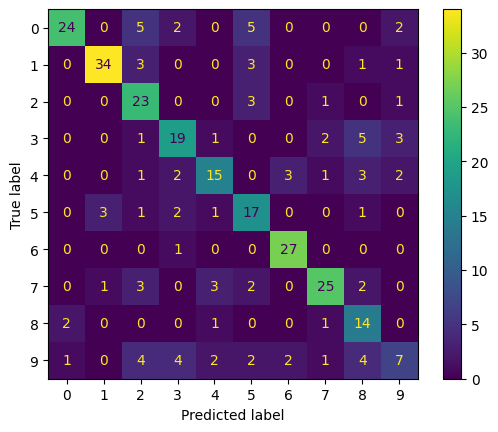

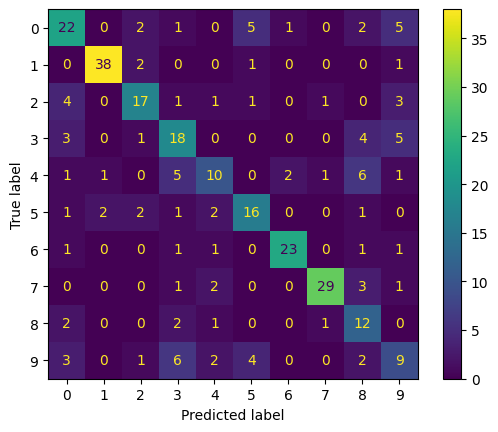

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 


rf_cm = confusion_matrix(y_test, rf_y_pred)
lr_cm = confusion_matrix(y_test, lr_y_pred)

rf_cmd = ConfusionMatrixDisplay(confusion_matrix=rf_cm)
rf_cmd.plot()
plt.show()

lr_cmd = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
lr_cmd.plot()
plt.show()

initializing logistic regression classifier
lbfgs


/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


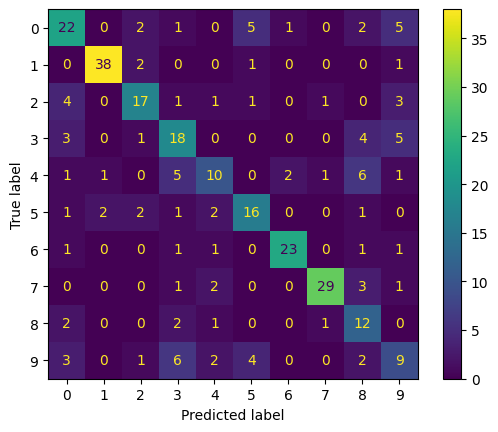

initializing logistic regression classifier
liblinear


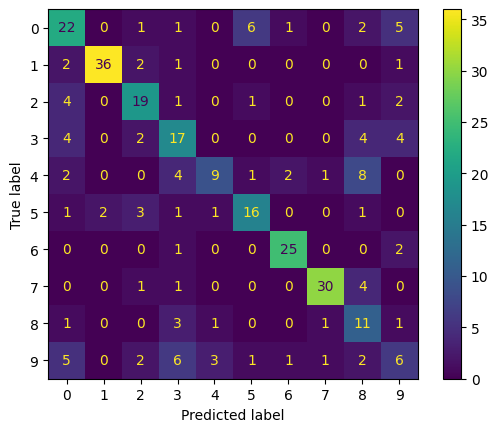

initializing logistic regression classifier
newton-cg


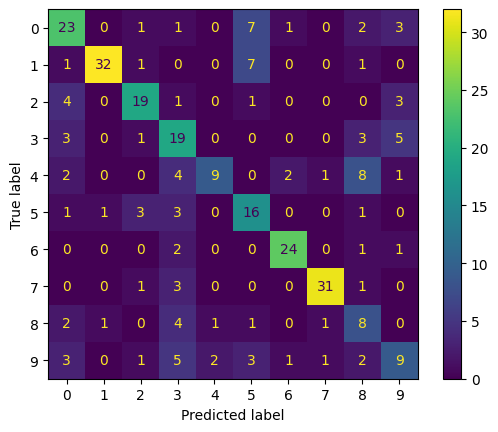

initializing logistic regression classifier
newton-cholesky


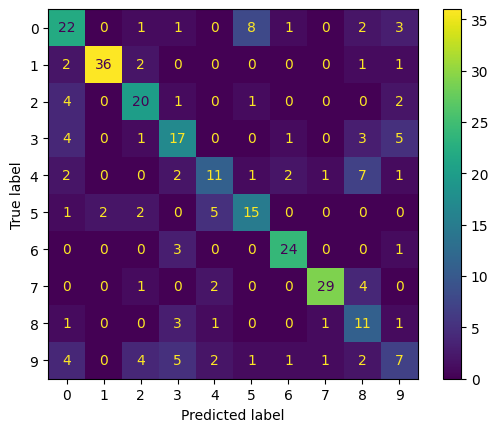

initializing logistic regression classifier
sag


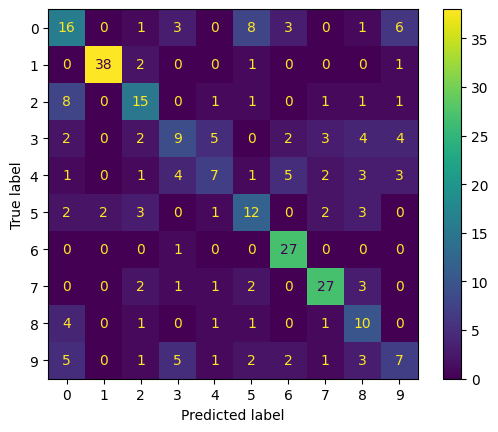

initializing logistic regression classifier
saga


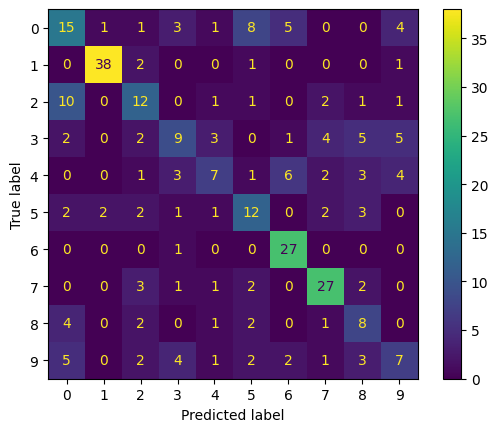

In [26]:
#variations on logistic regression - solver

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt 

# "keys"
lr_solvers = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'] # only newton-cg, sag, saga, lbfgs are multiclass

# predictions
lr_pred = []

# fill predictions
for s in lr_solvers:
    lr = logistic_regression()
    lr_model = lr.gen(solver=s) # todo try penalties in saga 
    lr.fit(X_train, y_train)
    lr_y_pred = lr.pred(X_test)
    lr_pred.append(lr_y_pred)
    lr_cm = confusion_matrix(y_test, lr_y_pred)
    lr_cmd = ConfusionMatrixDisplay(confusion_matrix=lr_cm)
    lr_cmd.plot()
    print(s)
    plt.show()
    

In [19]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression

# get 1 vs rest probability per solver
prob_test_vec = []
for s in lr_solvers:
	model = OneVsRestClassifier(LogisticRegression(random_state=0, solver=s)).fit(X_train, y_train)
	prob_test_vec.append(model.predict_proba(X_test))

n_classes = 10
fpr = [0] * n_classes
tpr = [0] * n_classes
thresholds = [0] * n_classes
auc_score = [0] * n_classes

# get real value probability for roc_curve
y_test_roc = []
genre_list = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
for x in y_test:
	y_test_roc.append(np.array([1 if x==i else 0 for i in genre_list]))
y_test_roc = np.array(y_test_roc)

for p in prob_test_vec:
	for i in range(n_classes):
		fpr[i], tpr[i], thresholds[i] = roc_curve(y_test_roc[:, i], p[:, i])
		auc_score[i] = auc(fpr[i], tpr[i])

	print(auc_score)


/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://sci

[0.9386299718762556, 0.9928940568475453, 0.9252888655462185, 0.8124475356757405, 0.8325871659204992, 0.8880000000000001, 0.9892331932773109, 0.9830597643097643, 0.8520488573680063, 0.7633970967304301]
[0.9239654479710726, 0.9939091915836102, 0.9397321428571428, 0.8694088020146301, 0.8278388278388278, 0.8928, 0.9876575630252102, 0.9799031986531986, 0.8676122931442082, 0.787952787952788]
[0.9317999196464444, 0.9941860465116279, 0.9571953781512605, 0.8808010552824079, 0.8887532220865554, 0.8909090909090909, 0.9917279411764706, 0.9797979797979799, 0.8731284475965326, 0.7901234567901234]
[0.9319003615910005, 0.9932631967515688, 0.9573266806722689, 0.8805612183715074, 0.8887532220865554, 0.8882909090909091, 0.9918592436974789, 0.979692760942761, 0.8719464144996061, 0.7905304571971238]
[0.7390518280433909, 0.9433370247323736, 0.8167016806722689, 0.7540472478714474, 0.7236467236467237, 0.6981818181818182, 0.9315913865546218, 0.9182449494949495, 0.8175728920409772, 0.6866096866096866]
[0.708015

/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/ara/Documents/nyu_fa24_mir/mir_finalProj/.venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: T

lbfgs
liblinear
newton-cg
newton-cholesky
sag
saga


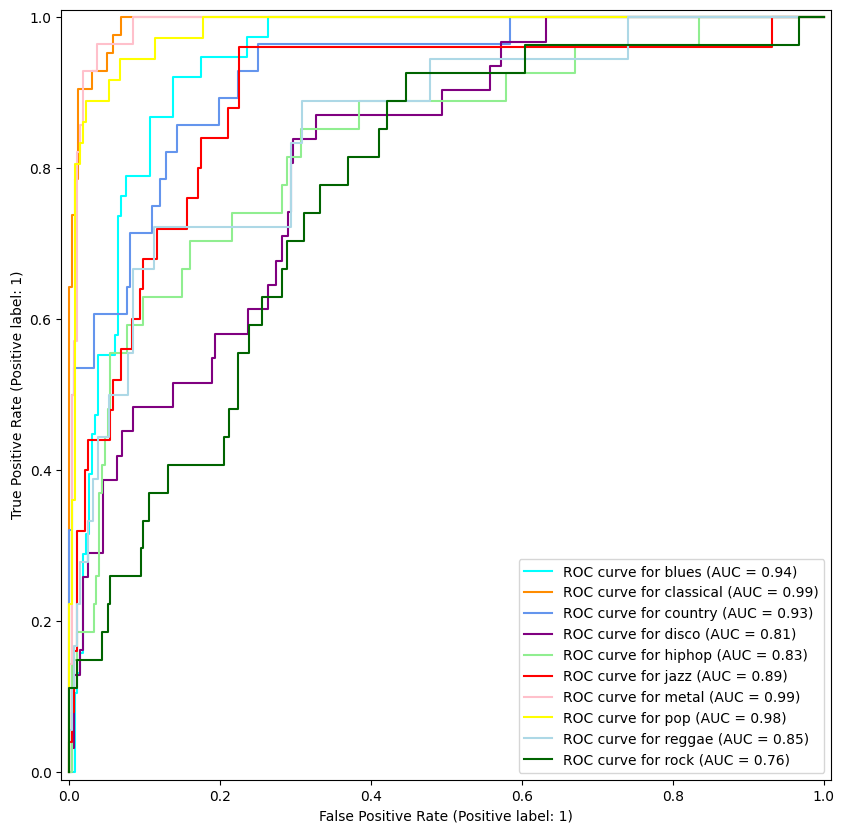

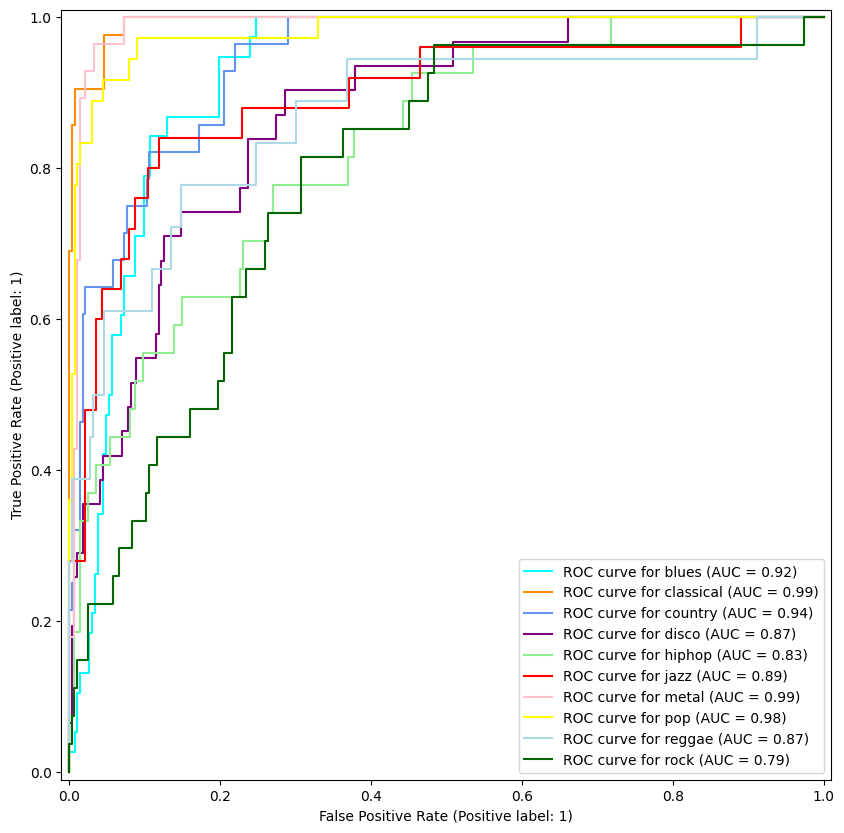

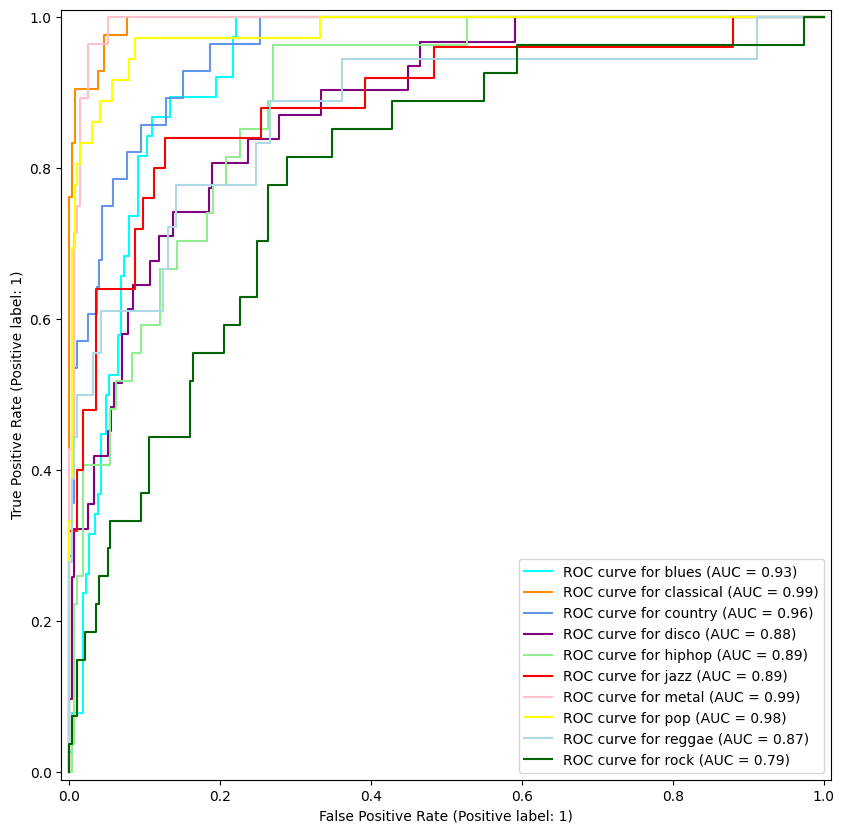

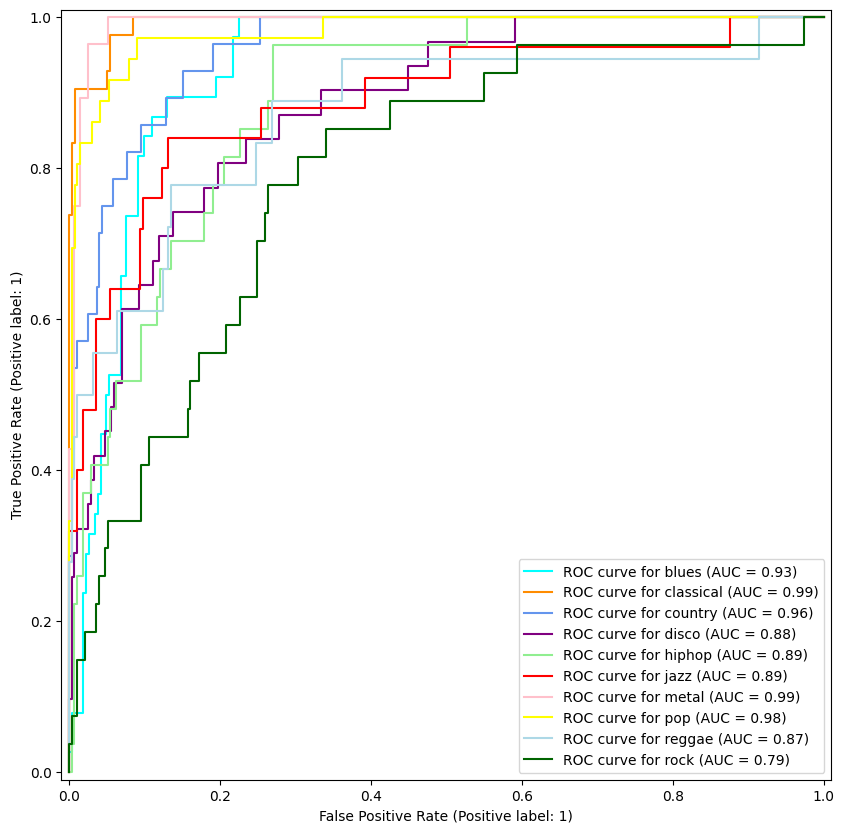

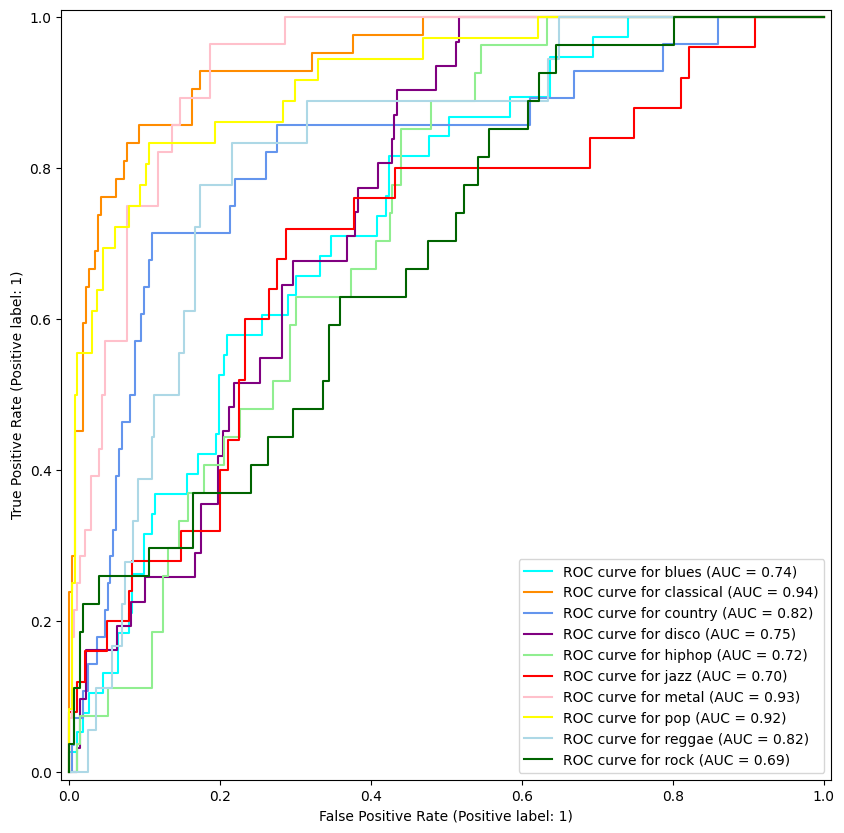

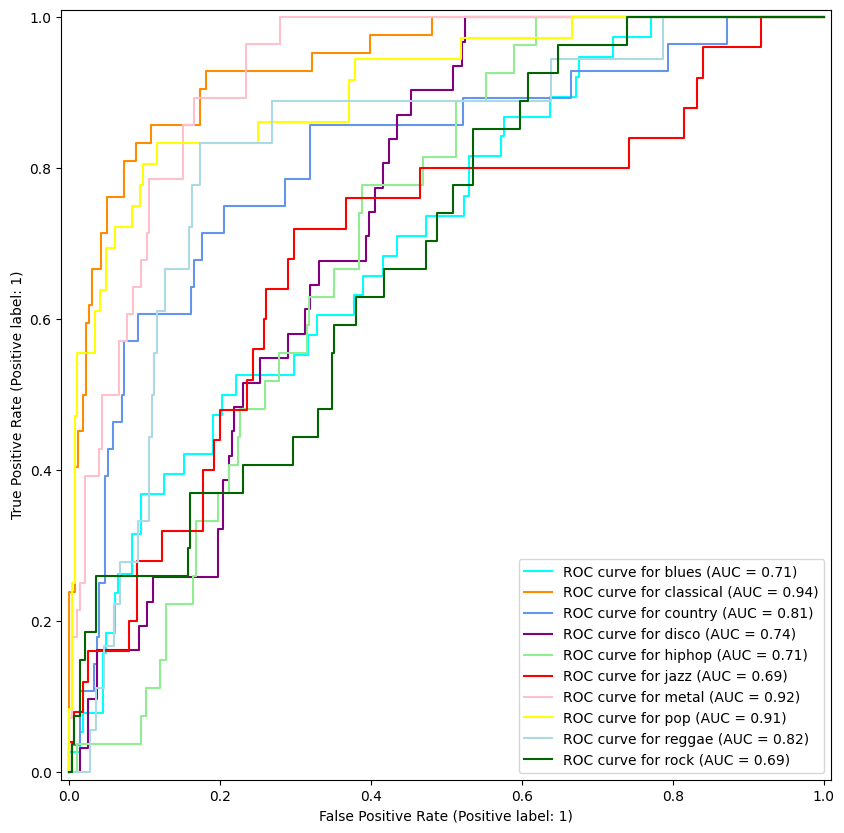

In [24]:
from sklearn.metrics import RocCurveDisplay
from itertools import cycle

for pid in range(len(lr_solvers)):
	p = prob_test_vec[pid]
	print(lr_solvers[pid])
	fig, ax = plt.subplots(figsize=(10, 10))
	target_names = genre_list
	colors = cycle(["aqua", "darkorange", "cornflowerblue", "purple", "lightgreen", "red", "pink", "yellow", "lightblue", "darkgreen"])
	for class_id, color in zip(range(n_classes), colors):
		RocCurveDisplay.from_predictions(
			y_test_roc[:, class_id],
			p[:, class_id],
			name=f"ROC curve for {target_names[class_id]}",
			color=color,
			ax=ax,
		)
